In [114]:
from pandas.core.internals import managers
import requests
import pandas as pd 
from bs4 import BeautifulSoup

name = []
prices= []
ratings = []
df = pd.DataFrame()

#Code for URL and checking page response
url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY"
page = requests.get(url)
html = page.content
response = requests.get(url)
response

#Code for extracting the data
#We need to extract data from nested div tags. In order to 
#extract the data and save it in a variable, we will locate the div tags that correspond to those class names.
soup = BeautifulSoup(response.text,"html.parser")
# main_box = soup.find_all("div",{"class":"_1YokD2 _3Mn1Gg"})
main_box = soup.find_all("div",{"class":"_2kHMtA"})

len(main_box)
box = main_box[0]
print(box)



  

<div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/lenovo-ideapad-ryzen-7-octa-core-5800h-16-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-rtx-3050-120-hz-15ach6-gaming-laptop/p/itmf6bd4da6fcd4b?pid=COMGZSFYTH3A4MVB&amp;lid=LSTCOMGZSFYTH3A4MVBXHMAXX&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_vuW1c6TruQGNcZeTW%2FaaMrmrec%2FZoKOYY5W1GoX0fvOVf1FmSkMUCbG10DF7fk70WlfwmC9TZtcZTzxZvhLfKw%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=77vd21xyls0000001683182252878&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="Lenovo IdeaPad Ryzen 7 Octa Core 5800H - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForc..." class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/kynb6vk0/computer/k/j/a/-original-

In [115]:

#creating a list to store data
data_list = []

#Finding and storing all the 24 items in the main box nested div
for b in main_box:
    t_dict = {}
    title = b.find('div',{'class':'_4rR01T'}).text.strip()
    price = b.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace('₹',' ').strip()
    rating = b.find('div',{'class':'_3LWZlK'})
    
    # if title is None or price is None or rating is None:
    #   t_dict ['TITLE'] = "N/A" 
    #   t_dict ['PRICE'] = "N/A"
    #   t_dict ['RATING'] = "N/A"

    t_dict ['TITLE'] = b.find('div',{'class':'_4rR01T'}).text.strip()
    t_dict ['PRICE'] = b.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace('₹',' ').strip()
    if b.find('div',{'class':'_3LWZlK'}) is not None:
      t_dict ['RATING'] = b.find('div',{'class':'_3LWZlK'}).text.strip()
    else:
      t_dict['RATING'] = 'N/A'
    # print(t_dict['PRICE'])

    data_list.append(t_dict)


In [116]:
#Creating a dataframe from the above appended data list
df = pd.DataFrame(data_list)
df

,TITLE,PRICE,RATING
0,Lenovo IdeaPad Ryzen 7 Octa Core 5800H - (16 G...,"69,990",4.4
1,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,"32,990",4.4
2,HP 14s Intel Core i3 11th Gen - (8 GB/512 GB S...,"37,490",4.3
3,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,"32,990",4.4
4,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,"82,900",4.7
5,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,"49,990",4.3
6,Infinix INBook X2 Plus Core i5 11th Gen - (16 ...,"38,990",4.3
7,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"43,490",4.2
8,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,"21,990",4.1
9,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H - (8 GB...,"48,990",4.3


In [117]:
#Creating a CSV file from the data frame so that data cleaning, analysis and visualization can be done on it
df.to_csv('Laptops.csv', index = False, encoding='utf-8')

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing CSV file(wrote thousands ="," to remove the  , in the price)
#sep(separator= none) if engine cannot automatically detect the separator, 
#but the Python parsing engine can, meaning the latter will be used and 
#automatically detect the separator by Python's builtin sniffer tool, csv.Sniffer .
laptops_df = pd.read_csv("Laptops.csv", sep = None, thousands =",", engine ='python')
laptops_df

,TITLE,PRICE,RATING
0,Lenovo IdeaPad Ryzen 7 Octa Core 5800H - (16 G...,69990,4.4
1,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,32990,4.4
2,HP 14s Intel Core i3 11th Gen - (8 GB/512 GB S...,37490,4.3
3,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,32990,4.4
4,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,82900,4.7
5,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,49990,4.3
6,Infinix INBook X2 Plus Core i5 11th Gen - (16 ...,38990,4.3
7,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,43490,4.2
8,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,21990,4.1
9,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H - (8 GB...,48990,4.3


In [119]:
#Shows the dimensions of the data frame- rows and columns
laptops_df.shape

(24, 3)

In [120]:
#Data type of DF
laptops_df.dtypes 

TITLE      object
PRICE       int64
RATING    float64
dtype: object

In [121]:
#Code to clean the data and divide it into further split the title into different
#columns to make it easier for analysis
laptops_df['MODEL'],laptops_df['spec']=laptops_df['TITLE'].str.split('-',1).str
del laptops_df['TITLE']
laptops_df.head()

<ipython-input-121-faa350e60bb5>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptops_df['MODEL'],laptops_df['spec']=laptops_df['TITLE'].str.split('-',1).str
<ipython-input-121-faa350e60bb5>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptops_df['MODEL'],laptops_df['spec']=laptops_df['TITLE'].str.split('-',1).str


,PRICE,RATING,MODEL,spec
0,69990,4.4,Lenovo IdeaPad Ryzen 7 Octa Core 5800H,(16 GB/512 GB SSD/Windows 11 Home/4 GB Graphi...
1,32990,4.4,realme Book (Slim) Core i3 11th Gen,(8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Th...
2,37490,4.3,HP 14s Intel Core i3 11th Gen,(8 GB/512 GB SSD/Windows 11 Home) 14s - dy250...
3,32990,4.4,realme Book (Slim) Core i3 11th Gen,(8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Th...
4,82900,4.7,APPLE 2020 Macbook Air M1,(8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A


In [122]:
laptops_df['RAM'],laptops_df['HDD']=laptops_df['spec'].str.split('(',1).str
del laptops_df['spec']
laptops_df.head()

<ipython-input-122-f5bb9b7ec888>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptops_df['RAM'],laptops_df['HDD']=laptops_df['spec'].str.split('(',1).str
<ipython-input-122-f5bb9b7ec888>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptops_df['RAM'],laptops_df['HDD']=laptops_df['spec'].str.split('(',1).str


,PRICE,RATING,MODEL,RAM,HDD
0,69990,4.4,Lenovo IdeaPad Ryzen 7 Octa Core 5800H,,16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics...
1,32990,4.4,realme Book (Slim) Core i3 11th Gen,,8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin...
2,37490,4.3,HP 14s Intel Core i3 11th Gen,,8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508T...
3,32990,4.4,realme Book (Slim) Core i3 11th Gen,,8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin...
4,82900,4.7,APPLE 2020 Macbook Air M1,,8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A


In [123]:
laptops_df['RAM'],laptops_df['Hard disk']=laptops_df['HDD'].str.split('/',1).str
del laptops_df['HDD']
laptops_df.head()

<ipython-input-123-91bb084ae13b>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptops_df['RAM'],laptops_df['Hard disk']=laptops_df['HDD'].str.split('/',1).str
<ipython-input-123-91bb084ae13b>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptops_df['RAM'],laptops_df['Hard disk']=laptops_df['HDD'].str.split('/',1).str


,PRICE,RATING,MODEL,RAM,Hard disk
0,69990,4.4,Lenovo IdeaPad Ryzen 7 Octa Core 5800H,16 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDI...
1,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD/Windows 10 Home) RMNB1001 Thin and ...
2,37490,4.3,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD/Windows 11 Home) 14s - dy2508TU Thi...
3,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD/Windows 10 Home) RMNB1001 Thin and ...
4,82900,4.7,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD/Mac OS Big Sur) MGN63HN/A


In [124]:
laptops_df['Storage'],laptops_df['OPERATING SYSTEM']=laptops_df['Hard disk'].str.split('/',1).str
del laptops_df['Hard disk']
laptops_df.head()

<ipython-input-124-871fc68d47d3>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptops_df['Storage'],laptops_df['OPERATING SYSTEM']=laptops_df['Hard disk'].str.split('/',1).str
<ipython-input-124-871fc68d47d3>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptops_df['Storage'],laptops_df['OPERATING SYSTEM']=laptops_df['Hard disk'].str.split('/',1).str


,PRICE,RATING,MODEL,RAM,Storage,OPERATING SYSTEM
0,69990,4.4,Lenovo IdeaPad Ryzen 7 Octa Core 5800H,16 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForc...
1,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop
2,37490,4.3,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home) 14s - dy2508TU Thin and Light...
3,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop
4,82900,4.7,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur) MGN63HN/A


In [125]:
laptops_df['OPERATINGSYSTEM'],laptops_df['GRAPHIC CARD']=laptops_df['OPERATING SYSTEM'].str.split('/',1).str
del laptops_df['OPERATING SYSTEM']
laptops_df.head()

<ipython-input-125-75ae65bb205d>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptops_df['OPERATINGSYSTEM'],laptops_df['GRAPHIC CARD']=laptops_df['OPERATING SYSTEM'].str.split('/',1).str
<ipython-input-125-75ae65bb205d>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptops_df['OPERATINGSYSTEM'],laptops_df['GRAPHIC CARD']=laptops_df['OPERATING SYSTEM'].str.split('/',1).str


,PRICE,RATING,MODEL,RAM,Storage,OPERATINGSYSTEM,GRAPHIC CARD
0,69990,4.4,Lenovo IdeaPad Ryzen 7 Octa Core 5800H,16 GB,512 GB SSD,Windows 11 Home,4 GB Graphics/NVIDIA GeForc...
1,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop,NaN
2,37490,4.3,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home) 14s - dy2508TU Thin and Light...,NaN
3,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop,NaN
4,82900,4.7,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur) MGN63HN,A


In [126]:
#Identifying missing values by using the isnull function
#this would let you know which value in the dataframe column is missing
#True - Missing value(Null)
#for eg. a laptop might have graphic card or rating missing if its a new product or maybe the company doesn't povide graphic cards for that model.
laptops_df.isnull()

,PRICE,RATING,MODEL,RAM,Storage,OPERATINGSYSTEM,GRAPHIC CARD
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False


In [127]:
#Calculate the data frame's overall missing value count. 
#The amount of missing values in each column can be determined using .isnull().sum()
laptops_df.isnull().sum()

PRICE               0
RATING              0
MODEL               0
RAM                 0
Storage             0
OPERATINGSYSTEM     0
GRAPHIC CARD       17
dtype: int64

In [128]:
#no of unique values in each column
laptops_df['MODEL'].nunique()

23

In [129]:
laptops_df['MODEL'].value_counts()

realme Book (Slim) Core i3 11th Gen                      2
Lenovo IdeaPad Ryzen 7 Octa Core 5800H                   1
MSI Bravo 15 Ryzen 5 Hexa Core AMD R5                    1
ASUS TUF Dash F15 (2022) Core i5 12th Gen                1
ASUS Vivobook S14 OLED Intel EVO H                       1
MSI Core i3 11th Gen                                     1
Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen     1
HP 15s Intel Core i5 12th Gen                            1
Lenovo Intel Celeron Dual Core                           1
ASUS Vivobook K15 OLED Ryzen 5 Hexa Core AMD R5          1
ASUS Vivobook 15 Core i3 11th Gen                        1
Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen             1
RedmiBook Pro Core i5 11th Gen                           1
HP Laptop Core i3 11th Gen                               1
HP Intel Core i5 11th Gen                                1
Lenovo IdeaPad Ryzen 5 Hexa Core 5600H                   1
ASUS VivoBook 14 (2021) Celeron Dual Core               

In [130]:
#Descriptive data
#description contains these information for each column:
#count - The number of not-empty values.
#mean - The average (mean) value.
#std - The standard deviation.
#min - the minimum value.
#25% - The 25% percentile*.
#50% - The 50% percentile*.
#75% - The 75% percentile*.
#max - the maximum value.
laptops_df.describe()

,PRICE,RATING
count,24.000000,24.000000
mean,45924.166667,4.304167
std,16411.401370,0.173153
min,21990.000000,4.000000
25%,33990.000000,4.200000
50%,41240.000000,4.300000
75%,52740.000000,4.400000
max,82900.000000,4.700000


In [131]:
laptops_df

,PRICE,RATING,MODEL,RAM,Storage,OPERATINGSYSTEM,GRAPHIC CARD
0,69990,4.4,Lenovo IdeaPad Ryzen 7 Octa Core 5800H,16 GB,512 GB SSD,Windows 11 Home,4 GB Graphics/NVIDIA GeForc...
1,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop,NaN
2,37490,4.3,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home) 14s - dy2508TU Thin and Light...,NaN
3,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop,NaN
4,82900,4.7,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur) MGN63HN,A
5,49990,4.3,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphics/NVIDIA...
6,38990,4.3,Infinix INBook X2 Plus Core i5 11th Gen,16 GB,512 GB SSD,Windows 11 Home) XL25 Thin and Light Lapto...,NaN
7,43490,4.2,HP 15s Intel Core i3 12th Gen,8 GB,512 GB SSD,Windows 11 Home) 15s-fq5007TU Thin and Light L...,NaN
8,21990,4.1,ASUS VivoBook 14 (2021) Celeron Dual Core,4 GB,256 GB SSD,Windows 11 Home) X415MA-BV011W Thin and L...,NaN
9,48990,4.3,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphics/NVIDIA GeForce...


In [132]:
#data cleaning(reordering indexes)
columns_titles = ["MODEL","RAM","Storage","OPERATINGSYSTEM","GRAPHIC CARD","PRICE","RATING"]
clean_laptops_df =laptops_df.reindex(columns=columns_titles)

In [133]:
clean_laptops_df

,MODEL,RAM,Storage,OPERATINGSYSTEM,GRAPHIC CARD,PRICE,RATING
0,Lenovo IdeaPad Ryzen 7 Octa Core 5800H,16 GB,512 GB SSD,Windows 11 Home,4 GB Graphics/NVIDIA GeForc...,69990,4.4
1,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop,NaN,32990,4.4
2,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home) 14s - dy2508TU Thin and Light...,NaN,37490,4.3
3,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop,NaN,32990,4.4
4,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur) MGN63HN,A,82900,4.7
5,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphics/NVIDIA...,49990,4.3
6,Infinix INBook X2 Plus Core i5 11th Gen,16 GB,512 GB SSD,Windows 11 Home) XL25 Thin and Light Lapto...,NaN,38990,4.3
7,HP 15s Intel Core i3 12th Gen,8 GB,512 GB SSD,Windows 11 Home) 15s-fq5007TU Thin and Light L...,NaN,43490,4.2
8,ASUS VivoBook 14 (2021) Celeron Dual Core,4 GB,256 GB SSD,Windows 11 Home) X415MA-BV011W Thin and L...,NaN,21990,4.1
9,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphics/NVIDIA GeForce...,48990,4.3


In [134]:
#analysis to find the most affordable laptop
clean_laptops_df[clean_laptops_df.PRICE<=25000]

,MODEL,RAM,Storage,OPERATINGSYSTEM,GRAPHIC CARD,PRICE,RATING
8,ASUS VivoBook 14 (2021) Celeron Dual Core,4 GB,256 GB SSD,Windows 11 Home) X415MA-BV011W Thin and L...,NaN,21990,4.1
19,Infinix Y1 Plus Neo Intel Celeron Quad Core 11...,8 GB,256 GB SSD,Windows 11 Home) XL30 Thin and...,NaN,22990,4.2


In [135]:
#affordable with a higher customer rating
clean_laptops_df[(clean_laptops_df['PRICE']>=30000) & (clean_laptops_df['PRICE']<=40000) & (clean_laptops_df['RATING']>=4.0)]

,MODEL,RAM,Storage,OPERATINGSYSTEM,GRAPHIC CARD,PRICE,RATING
1,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop,NaN,32990,4.4
2,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home) 14s - dy2508TU Thin and Light...,NaN,37490,4.3
3,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop,NaN,32990,4.4
6,Infinix INBook X2 Plus Core i5 11th Gen,16 GB,512 GB SSD,Windows 11 Home) XL25 Thin and Light Lapto...,NaN,38990,4.3
11,HP Laptop Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home) 15s-fq2717TU Thin and Light L...,NaN,38990,4.2
12,RedmiBook Pro Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home) Thin and Light Laptop,NaN,37990,4.1
14,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home) 15ITL05 Thin and Ligh...,NaN,33990,4.2
15,ASUS Vivobook 15 Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home) X515EA-EJ322WS | X515EA-EJ328...,NaN,34990,4.2
17,Lenovo Intel Celeron Dual Core,8 GB,256 GB SSD,Windows 11 Home) 81WQ00MQIN|81WQ00NXIN Laptop,NaN,30500,4.1
20,MSI Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home) Modern 14 C11M-031IN Thin and...,NaN,33990,4.7


In [136]:
#Best laptops based on rating greater than equal to 4.0 and within a medium budger of Rs. 40000-50000
clean_laptops_df[(clean_laptops_df['PRICE']>=40000) & (clean_laptops_df['PRICE']<=55000) & (clean_laptops_df['RATING']>=4.0)]

,MODEL,RAM,Storage,OPERATINGSYSTEM,GRAPHIC CARD,PRICE,RATING
5,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphics/NVIDIA...,49990,4.3
7,HP 15s Intel Core i3 12th Gen,8 GB,512 GB SSD,Windows 11 Home) 15s-fq5007TU Thin and Light L...,NaN,43490,4.2
9,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphics/NVIDIA GeForce...,48990,4.3
10,HP Intel Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home) 15s- fr4000TU Thin and Light ...,NaN,51990,4.3
13,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphics/AMD Radeo...,49990,4.4
16,ASUS Vivobook K15 OLED Ryzen 5 Hexa Core AMD R5,16 GB,512 GB SSD,Windows 11 Home) KM513UA-L51...,NaN,46990,4.4
18,HP 15s Intel Core i5 12th Gen,8 GB,512 GB SSD,Windows 11 Home) 15s-fq5111TU Thin and Light L...,NaN,54990,4.2
23,ASUS TUF Gaming A15 Ryzen 5 Hexa Core AMD R5,8 GB,1 TB SSD,Windows 11 Home,4 GB Graphics/NVID...,54990,4.4


In [137]:
#best laptops based on rating>=4.5 but with high price range
clean_laptops_df[(clean_laptops_df['PRICE']>=80000) & (clean_laptops_df['RATING']>=4.5)]

,MODEL,RAM,Storage,OPERATINGSYSTEM,GRAPHIC CARD,PRICE,RATING
4,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur) MGN63HN,A,82900,4.7


In [138]:
#Data Visualization

import matplotlib.pyplot as plt
%matplotlib inline 

Text(0.5, 1.0, 'RATING VS PRICE')

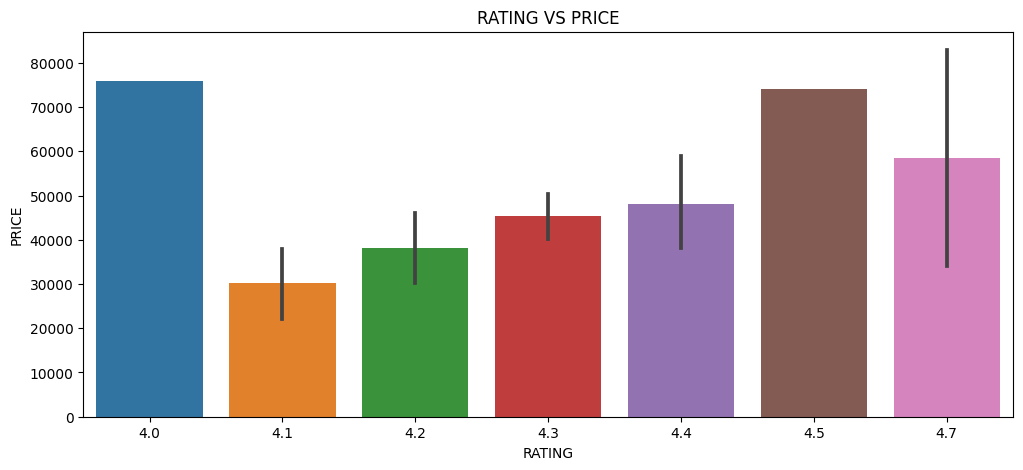

In [139]:
#bar plot of price vs rating
plt.figure(figsize=(12,5))
sns.barplot(x=clean_laptops_df['RATING'],y=clean_laptops_df['PRICE'])
plt.title("RATING VS PRICE")

Products with higher price possibly have higher ratings

Text(0.5, 1.0, 'Box Plot')

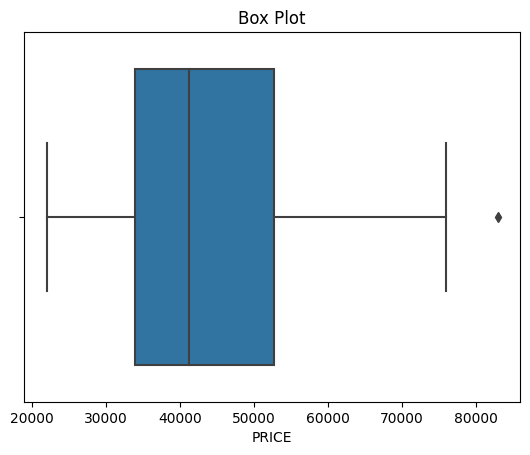

In [140]:
sns.boxplot(x=clean_laptops_df['PRICE'])
plt.title("Box Plot")

There is 1 outliners which means that there is  1 laptop that have a higher price range.
We can conclude that there are laptops with good customer reviews in the range on 4.2-4.4 which also come in user friendly budget of Rs.38000 - 
Rs.55000